# Regularization Techniques: Ridge, Lasso, and Elastic Net

Regularization techniques are essential tools in regression to manage overfitting, which occurs when a model becomes too complex and fits the noise in the training data, leading to poor generalization on new data. By adding a penalty term to the loss function, regularization discourages large model coefficients, simplifying the model and improving its ability to generalize. Below, we explore three popular regularization techniques: **Ridge**, **Lasso**, and **Elastic Net**.

## 1. Ridge Regression (L2 Regularization)

### Overview
Ridge regression, also known as L2 regularization, penalizes the sum of the squared coefficients. This forces the model to favor smaller coefficients, shrinking the less important feature coefficients closer to zero, but not eliminating them entirely. Ridge is particularly useful when all features are potentially relevant, but their contributions vary in magnitude.

### Loss Function
$$
\text{Loss} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} \beta_j^2
$$

Where:
- $y_i$ are the actual values,
- $\hat{y}_i$ are the predicted values,
- $\beta_j$ are the model coefficients,
- $\lambda$ is the regularization strength (larger values of $\lambda$ mean more regularization).

### Key Points
- **Effect on coefficients**: Shrinks all coefficients but retains all features.
- **Use case**: When you expect most features to contribute to the outcome but to varying degrees.
- **Limitation**: Does not perform feature selection as all coefficients are reduced but none become zero.

---

## 2. Lasso Regression (L1 Regularization)

### Overview
Lasso regression, also known as L1 regularization, adds a penalty equal to the absolute value of the coefficients. Unlike Ridge, Lasso can shrink some coefficients all the way to zero, effectively removing them from the model. This makes Lasso a powerful tool for **feature selection**.

### Loss Function
$$
\text{Loss} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} |\beta_j|
$$

Where:
- $y_i$ are the actual values,
- $\hat{y}_i$ are the predicted values,
- $\beta_j$ are the model coefficients,
- $\lambda$ is the regularization strength.

### Key Points
- **Effect on coefficients**: Shrinks some coefficients to zero, effectively performing feature selection.
- **Use case**: When you believe that only a subset of the features are truly relevant.
- **Limitation**: May perform poorly when many features are correlated since Lasso tends to pick one feature and ignore others.

---

## 3. Elastic Net Regression (Combination of L1 and L2)

### Overview
Elastic Net combines the penalties of both Ridge (L2) and Lasso (L1) regression, offering a compromise between the two. Elastic Net is particularly useful when there are multiple correlated features, as it allows for both **shrinkage** (like Ridge) and **feature selection** (like Lasso). It introduces a mixing parameter, $\alpha$, to balance between L1 and L2 penalties.

### Loss Function
$$
\text{Loss} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \left( \alpha \sum_{j=1}^{p} |\beta_j| + (1-\alpha) \sum_{j=1}^{p} \beta_j^2 \right)
$$

Where:
- $y_i$ are the actual values,
- $\hat{y}_i$ are the predicted values,
- $\beta_j$ are the model coefficients,
- $\lambda$ is the overall regularization strength,
- $\alpha$ controls the balance between L1 (Lasso) and L2 (Ridge) penalties.

### Key Points
- **Effect on coefficients**: Balances between Ridge’s shrinkage and Lasso’s feature selection.
- **Use case**: When you have a mix of important and irrelevant features, or when features are correlated.
- **Limitation**: Adds an extra hyperparameter ($\alpha$) to tune, making the model more complex to optimize.

---

## Conclusion

- **Ridge Regression** is ideal when all features contribute to the model, but their influence needs to be constrained.
- **Lasso Regression** is valuable when you want a sparse model, as it can shrink some feature coefficients to zero, performing feature selection.
- **Elastic Net Regression** combines the strengths of Ridge and Lasso, making it suitable when you need both regularization and feature selection, especially when features are correlated.

By using these regularization techniques, you can control overfitting and build models that generalize better to new, unseen data.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error


In [8]:
X = np.linspace(0, 5, 100).reshape(-1, 1)
y = -5*X + X**2 + np.random.normal(0, 0.5, X.shape[0]).reshape(-1, 1)

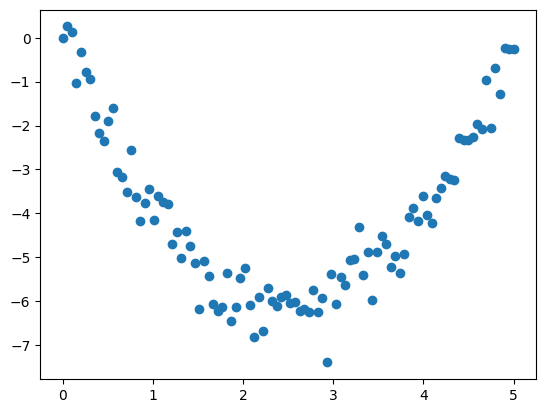

In [9]:
plt.scatter(X, y)

## Linear Regression
Let's start with linear regression to see how well it fits the data.

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on training and testing data
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

# Calculate R-squared and mean squared error for evaluation
linear_r2_train = r2_score(y_train, y_train_pred)
linear_r2_test = r2_score(y_test, y_test_pred)
linear_mse_train = mean_squared_error(y_train, y_train_pred)
linear_mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Linear Regression:")
print(f"Training R-squared: {linear_r2_train:.4f}, Training MSE: {linear_mse_train:.4f}")
print(f"Testing R-squared: {linear_r2_test:.4f}, Testing MSE: {linear_mse_test:.4f}")


Linear Regression:
Training R-squared: 0.0012, Training MSE: 3.6764
Testing R-squared: -0.0349, Testing MSE: 3.8937


## Polynomial Regression with Degree of 2
Now, let's perform polynomial regression with a degree of 2 to capture more complex relationships in the data.

In [11]:
# Transform the features to include polynomial features of degree 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split the polynomial features into training and testing sets
X_poly_train, X_poly_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)

# Create and fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# Make predictions on training and testing data
y_train_pred_poly = poly_model.predict(X_poly_train)
y_test_pred_poly = poly_model.predict(X_poly_test)

# Calculate R-squared and mean squared error for evaluation
poly_r2_train = r2_score(y_train, y_train_pred_poly)
poly_r2_test = r2_score(y_test, y_test_pred_poly)
poly_mse_train = mean_squared_error(y_train, y_train_pred_poly)
poly_mse_test = mean_squared_error(y_test, y_test_pred_poly)

print(f"\nPolynomial Regression (Degree 2):")
print(f"Training R-squared: {poly_r2_train:.4f}, Training MSE: {poly_mse_train:.4f}")
print(f"Testing R-squared: {poly_r2_test:.4f}, Testing MSE: {poly_mse_test:.4f}")


Polynomial Regression (Degree 2):
Training R-squared: 0.9447, Training MSE: 0.2036
Testing R-squared: 0.9473, Testing MSE: 0.1982


## Polynomial Regression with higher Degree
Next, let's perform polynomial regression with a higher degree to observe overfitting. The training result is better than the testing result.

In [12]:
# Transform the features to include polynomial features of higher
degree = 21
poly_high_degree = PolynomialFeatures(degree=degree)
X_poly_high_degree = poly_high_degree.fit_transform(X)

# Split the high-degree polynomial features into training and testing sets
X_poly_high_degree_train, X_poly_high_degree_test, y_train, y_test = train_test_split(
    X_poly_high_degree, y, test_size=0.2, random_state=0)

# Create and fit the high-degree polynomial regression model
poly_model_high_degree = LinearRegression()
poly_model_high_degree.fit(X_poly_high_degree_train, y_train)

# Make predictions on training and testing data
y_train_pred_high_degree = poly_model_high_degree.predict(X_poly_high_degree_train)
y_test_pred_high_degree = poly_model_high_degree.predict(X_poly_high_degree_test)

# Calculate R-squared and mean squared error for evaluation
poly_r2_train_high_degree = r2_score(y_train, y_train_pred_high_degree)
poly_r2_test_high_degree = r2_score(y_test, y_test_pred_high_degree)
poly_mse_train_high_degree = mean_squared_error(y_train, y_train_pred_high_degree)
poly_mse_test_high_degree = mean_squared_error(y_test, y_test_pred_high_degree)

print(f"\nPolynomial Regression (Degree {degree}):")
print(f"Training R-squared: {poly_r2_train_high_degree:.4f}, Training MSE: {poly_mse_train_high_degree:.4f}")
print(f"Testing R-squared: {poly_r2_test_high_degree:.4f}, Testing MSE: {poly_mse_test_high_degree:.4f}")



Polynomial Regression (Degree 21):
Training R-squared: 0.9543, Training MSE: 0.1682
Testing R-squared: 0.9288, Testing MSE: 0.2680


## Regularization (Ridge, Lasso, Elastic Net)
Finally, let's introduce regularization techniques to mitigate overfitting in the high-degree polynomial regression.

In [13]:
# Regularization strengths
alpha_ridge = 0.001
alpha_lasso = 0.001
alpha_elasticnet = 0.001
l1_ratio_elasticnet = 0.5

# Create and fit the Ridge, Lasso, and ElasticNet regression models
ridge_model = Ridge(alpha=alpha_ridge)
ridge_model.fit(X_poly_high_degree_train, y_train)

lasso_model = Lasso(alpha=alpha_lasso)
lasso_model.fit(X_poly_high_degree_train, y_train)

elasticnet_model = ElasticNet(alpha=alpha_elasticnet, l1_ratio=l1_ratio_elasticnet)
elasticnet_model.fit(X_poly_high_degree_train, y_train)

# Make predictions on training and testing data for all regularized models
y_train_pred_ridge = ridge_model.predict(X_poly_high_degree_train)
y_test_pred_ridge = ridge_model.predict(X_poly_high_degree_test)

y_train_pred_lasso = lasso_model.predict(X_poly_high_degree_train)
y_test_pred_lasso = lasso_model.predict(X_poly_high_degree_test)

y_train_pred_elasticnet = elasticnet_model.predict(X_poly_high_degree_train)
y_test_pred_elasticnet = elasticnet_model.predict(X_poly_high_degree_test)

# Calculate R-squared and mean squared error for evaluation
ridge_r2_train = r2_score(y_train, y_train_pred_ridge)
ridge_r2_test = r2_score(y_test, y_test_pred_ridge)
ridge_mse_train = mean_squared_error(y_train, y_train_pred_ridge)
ridge_mse_test = mean_squared_error(y_test, y_test_pred_ridge)

lasso_r2_train = r2_score(y_train, y_train_pred_lasso)
lasso_r2_test = r2_score(y_test, y_test_pred_lasso)
lasso_mse_train = mean_squared_error(y_train, y_train_pred_lasso)
lasso_mse_test = mean_squared_error(y_test, y_test_pred_lasso)

elasticnet_r2_train = r2_score(y_train, y_train_pred_elasticnet)
elasticnet_r2_test = r2_score(y_test, y_test_pred_elasticnet)
elasticnet_mse_train = mean_squared_error(y_train, y_train_pred_elasticnet)
elasticnet_mse_test = mean_squared_error(y_test, y_test_pred_elasticnet)

print("\nRegularization:")
print(f"Ridge Regression - Training R-squared: {ridge_r2_train:.4f}, Testing R-squared: {ridge_r2_test:.4f}")
print(f"Lasso Regression - Training R-squared: {lasso_r2_train:.4f}, Testing R-squared: {lasso_r2_test:.4f}")
print(f"ElasticNet Regression - Training R-squared: {elasticnet_r2_train:.4f}, Testing R-squared: {elasticnet_r2_test:.4f}")



Regularization:
Ridge Regression - Training R-squared: 0.9556, Testing R-squared: 0.9293
Lasso Regression - Training R-squared: 0.9473, Testing R-squared: 0.9442
ElasticNet Regression - Training R-squared: 0.9472, Testing R-squared: 0.9434


d:\anaconda\envs\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.231e+00, tolerance: 2.945e-02
  model = cd_fast.enet_coordinate_descent(
d:\anaconda\envs\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.490e+00, tolerance: 2.945e-02
  model = cd_fast.enet_coordinate_descent(
